# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [10]:
kmeans = KMeans(n_clusters= 4, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [11]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

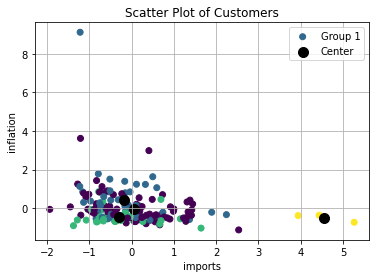

In [12]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 3
x2_index = 5


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [13]:
WCSSs = []
Ks = range(1,13)
for k in Ks:
  kmeans = KMeans(n_clusters = k, init = 'random')
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

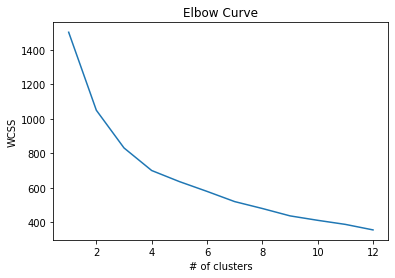

In [14]:
plt.plot(Ks,WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

When k=2 and k=4, they are clearly the elbows, and the k after them are decreasing smaller in sum of squared distances became, will lead to overfitting eventually.
So I will Pick K=4 as health and income can be interpreted more clearly considering relative small sample size

In [30]:
kmeans = KMeans(n_clusters = 4, n_init=30 , random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=30, random_state=42)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [31]:
p1 = kmeans.predict(X_scaled)
g1= df[p1==0]
g2= df[p1==1]
g3= df[p1==2]
g4= df[p1==3]

g1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500


In [32]:
g2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769


In [33]:
g3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800


In [34]:
g4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


I found that in g1 and g2, most countries are developing countries. For g3 and g4, most of the countries are developed contries, resulting in a higher gdp and income, with a better health condition

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [50]:
pd.concat([pd.DataFrame(p1), X], axis = 1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# Q7.) Write an observation about the descriptive statistics.

Cluster 3 has the highest health condition of 9.169 and 2nd highest income of 45250, Cluster 4 has 2nd highest helath condition of 6.79 and highest income of 64033. Cluster 1 and 2 has low health condtion and way lower income. The results are consistant with the relationship of higher income, better health.